# Energy Efficiency <br>
by <br>
Mike Nelson and  <br>
Gordon Carter and <br>
Rebekah Silva <br>
May 2022

## Problem Statement <br>
Energy efficient building design. What features are most impactful for saving energy costs.

## Data Source <br>
UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

## KPIs

## Data Dictionary <br>

X1 Relative Compactness <br>
X2 Surface Area <br>
X3 Wall Area <br>
X4 Roof Area <br>
X5 Overall Height <br>
X6 Orientation <br>
X7 Glazing Area <br>
X8 Glazing Area Distribution <br>
y1 Heating Load <br>
y2 Cooling Load <br>

### Libraries

In [21]:
# Load libraries
import pandas as pd
import numpy as np 

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, KFold,cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [3]:
dataset = pd.read_csv("ENB2012_data.csv") 
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
dataset.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [7]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Visualization

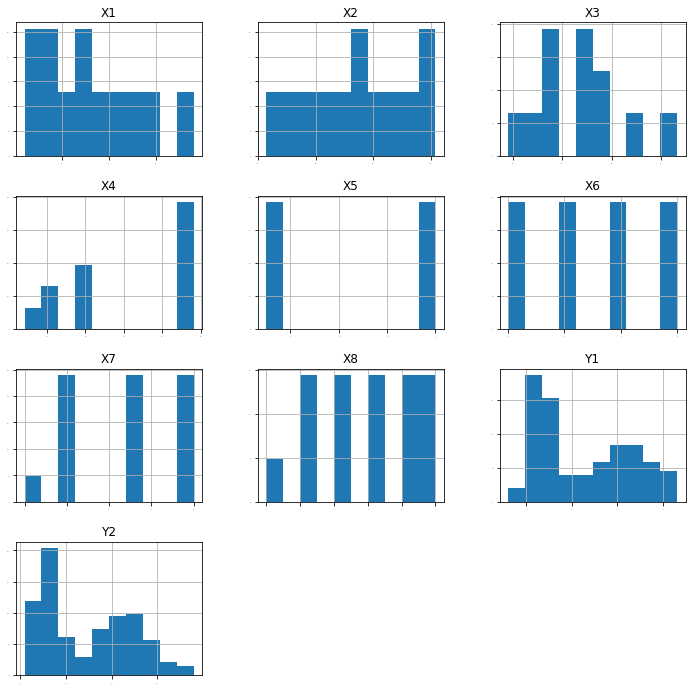

In [8]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

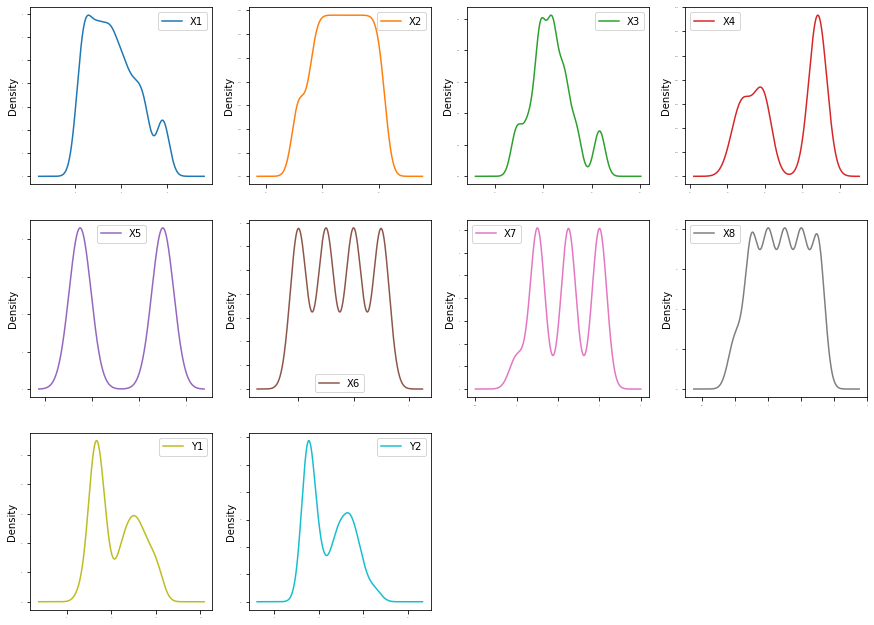

In [9]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

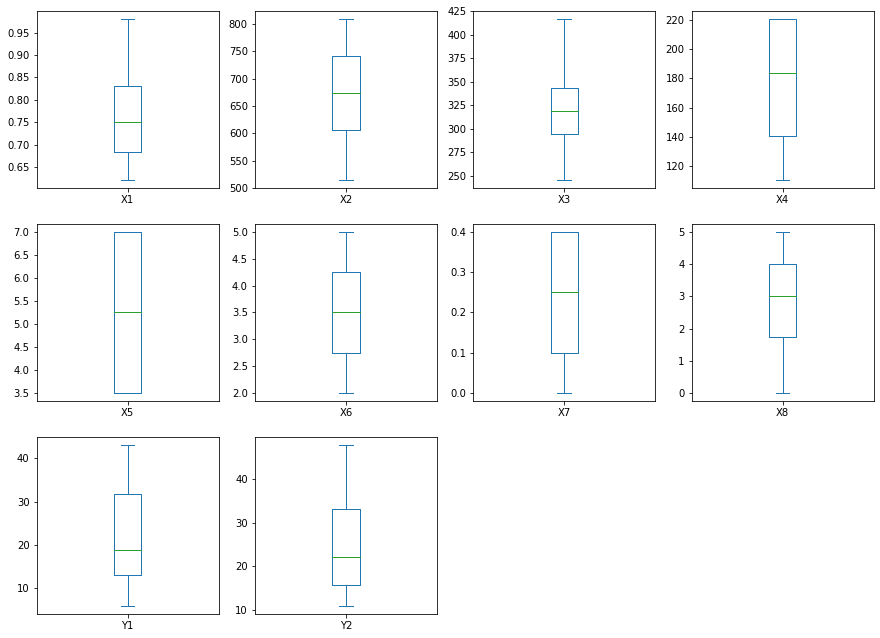

In [10]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

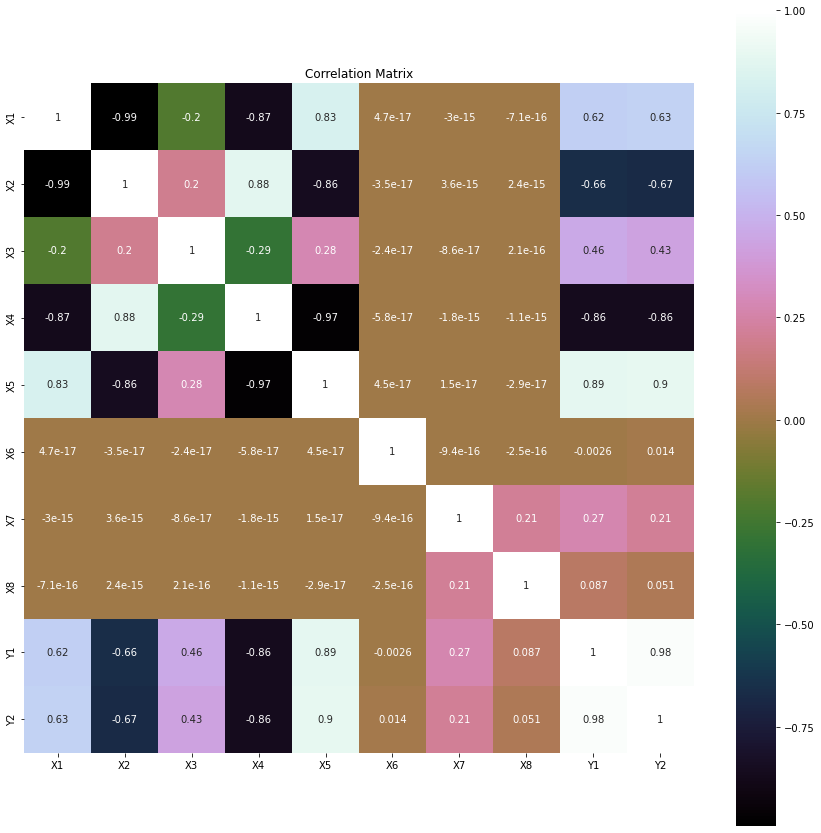

In [11]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

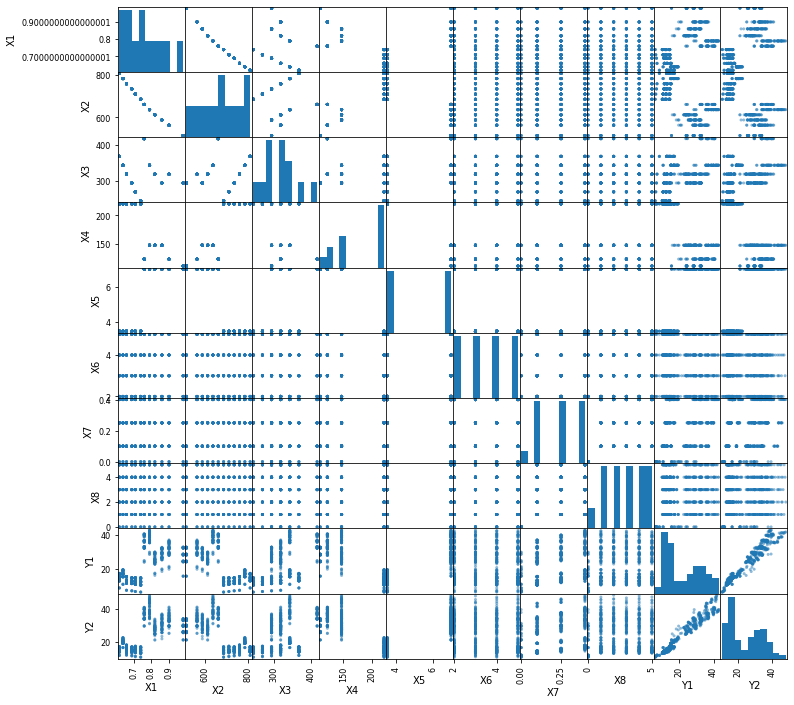

In [12]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
plt.show()

## Data Cleaning

In [13]:
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [15]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Linear Regression Model

In [16]:
x = dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]
y1 = dataset['Y1']
y2 = dataset['Y2']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y1, test_size = 0.2, random_state = 12)

In [22]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.9021404715181937

In [25]:
kfold_cv = KFold(n_splits = 5)

cv1 = cross_validate(LinearRegression(), x,y1, cv = kfold_cv)
cv1

{'fit_time': array([0.00201869, 0.00096583, 0.00199437, 0.00199509, 0.00100374]),
 'score_time': array([0.0009985 , 0.0009973 , 0.0009973 , 0.00101852, 0.00098705]),
 'test_score': array([0.7977198 , 0.89514555, 0.92291016, 0.91640464, 0.9163398 ])}

In [27]:
cv1['test_score'].mean()

0.889703990046149

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y2, test_size = 0.2, random_state = 12)

In [30]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)
lr2.score(X_test2, y_test2)

0.8606990922008388

In [31]:
kfold_cv2 = KFold(n_splits = 5)

cv2 = cross_validate(LinearRegression(), x,y2, cv = kfold_cv2)
cv2

{'fit_time': array([0.00199461, 0.0009985 , 0.00199795, 0.00099444, 0.00199413]),
 'score_time': array([0.00102639, 0.00099683, 0.0009973 , 0.00099659, 0.00099754]),
 'test_score': array([0.82757548, 0.86245676, 0.88920366, 0.89378436, 0.89281444])}

In [32]:
cv2['test_score'].mean()

0.873166941967589